Word2Vec 란
  - Word2Vec은 단어를 벡터로 변환하는 딥러닝 기반 자연어 처리 기법
  - 주어진 말뭉치(corpus)에서 단어 간 의미적 유사도를 학습하여, 단어를 고차원 공간에 실수 벡터로 표현
  - Word2Vec에는 CBOW(Continuous Bag of Words)모델과 Skip-gram 모델 두가지 있습니다

Word2Vec은 신경망을 이용해서 단어의 의미적 관계를 학습

1. CBOW모델(Continuous Bag of Words)
  - 주변단어(context word)를 입력으로 받아  중심 단어(target word)를 예측하는 방식
  - CBOW 구조 예
    - 예제문장
      - "The cat sits on the mat"
      - 여기서 center word가 "sits"라고 하면 CBOW 모델은 "The",'cat','on','the' 를 보고 'sits'를 예측하도록 학습
      - 학습목표 확률을 최대화
      - P(wt|wt-2, wt-1,wt+1,wt+2)
      - 중심단어 wt가 주변단어들 wt-2, wt-1,wt+1,wt+2로부터 예측될 확률을 최대화 하는 것을 의미함

2.skip-gram 구조
  - CBOW와 반대 .중심단어(target word)를 입력받아서 주변단어를(context word)를 예측
  - 예제문장
      - "The cat sits on the mat"
      - center word 'sits'라고 하면 skip-gram모델은 'The','cat','on','the'를 예측하도록 학습
      - P(wt-2, wt-1,wt+1,wt+2|wt)
      - 중심단어 wt가 주변단어들 wt-2, wt-1,wt+1,wt+2로부터 예측될 확률을 최대화 하는 것을 의미함

In [1]:
# word2vec의 학습과정
# 1. 말뭉치 준비(Corpus) : 텍스트 데이터를 수집하고 전처리
# 2. 윈도우 크기 설정 : 모델을 선택(2가지 중 하나), 단어를 예측할 주변 단어의 개수를 선택
# 3. one-hot-encoding : 벡터로 변환후에 신경망을 통해 저차원 벡터로 임베딩
# 4. 신경망 학습 : Softmax 등을 이용해서 목표단어를 예측하면서 가중치를 조정해서 의미적 유사한 단어들이 가까이 위치하도록 학습

데이터 준비

In [6]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # nltk에서 제공하는 문장 및 단어 토큰화 도구
nltk.download('punkt_tab')  # 문장 토크나이져하고 단어 토크나이져가 작동할때 내부적으로 참조하는 규칙파일

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# 예제문장
sentences = [
   "The cat sits on the mat.",
    "The dog barks at the mailman.",
    "The cat and the dog are friends.",
    "The mat is under the table.",
    "The mailman delivers letters to the house."
]
# 토큰화
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

In [11]:
sentences[0].lower(), word_tokenize(sentences[0].lower())

('the cat sits on the mat.', ['the', 'cat', 'sits', 'on', 'the', 'mat', '.'])

In [12]:
tokenized_sentences

[['the', 'cat', 'sits', 'on', 'the', 'mat', '.'],
 ['the', 'dog', 'barks', 'at', 'the', 'mailman', '.'],
 ['the', 'cat', 'and', 'the', 'dog', 'are', 'friends', '.'],
 ['the', 'mat', 'is', 'under', 'the', 'table', '.'],
 ['the', 'mailman', 'delivers', 'letters', 'to', 'the', 'house', '.']]

In [16]:
# word2vec 모델 학습
# vector_size 각 단어의 벡터 차원 수  기본 값이 100 (추천 : 50 ~ 300)
# 50 :  작은모델(빠르지만 표현력이 낮음)
# 100 적절함
# 300 : 큰 모델(의미표현력이 높지만 학습 속도가 느려짐)
# window=2 주변단어를  학습할때 개수   기본값은 5
# min_count = 1 : 모든 단어를 학습(작은 데이터셋 적합)
# min_count = 5 : 5번 미만 등장한단어는 무시(노이즈제거 효과)
# sg = 1  기본값은 CBOW 모델... 1은 skip-gram(중심 단어를보고 주변단어를 예측)
model = Word2Vec(sentences = tokenized_sentences, vector_size=100,window=2,min_count=1,sg=1)
# 단어 벡터 확인
model.wv['cat']


array([-8.2426779e-03,  9.2993546e-03, -1.9766092e-04, -1.9672764e-03,
        4.6036304e-03, -4.0953159e-03,  2.7431143e-03,  6.9399667e-03,
        6.0654259e-03, -7.5107943e-03,  9.3823504e-03,  4.6718083e-03,
        3.9661205e-03, -6.2435055e-03,  8.4599797e-03, -2.1501649e-03,
        8.8251876e-03, -5.3620026e-03, -8.1294188e-03,  6.8245591e-03,
        1.6711927e-03, -2.1985089e-03,  9.5136007e-03,  9.4938548e-03,
       -9.7740470e-03,  2.5052286e-03,  6.1566923e-03,  3.8724565e-03,
        2.0227872e-03,  4.3050171e-04,  6.7363144e-04, -3.8206363e-03,
       -7.1402504e-03, -2.0888723e-03,  3.9238976e-03,  8.8186832e-03,
        9.2591504e-03, -5.9759365e-03, -9.4026709e-03,  9.7643770e-03,
        3.4297847e-03,  5.1661171e-03,  6.2823449e-03, -2.8042626e-03,
        7.3227035e-03,  2.8302716e-03,  2.8710044e-03, -2.3803699e-03,
       -3.1282497e-03, -2.3701417e-03,  4.2764368e-03,  7.6057913e-05,
       -9.5842788e-03, -9.6655441e-03, -6.1481940e-03, -1.2856961e-04,
      

In [17]:
# 유사도측정  cat과 유사한 단어 찾기
model.wv.most_similar('cat')

[('table', 0.1782098263502121),
 ('mailman', 0.1315031200647354),
 ('are', 0.07490666210651398),
 ('.', 0.06790068745613098),
 ('is', 0.04151185601949692),
 ('at', 0.04121294617652893),
 ('sits', 0.041170384734869),
 ('to', 0.012966764159500599),
 ('under', 0.006594092585146427),
 ('house', -0.0018632792634889483)]

단어 벡터 시각화

['the', '.', 'dog', 'cat', 'mat', 'mailman', 'is', 'friends', 'are', 'and', 'to', 'at', 'barks', 'under', 'table', 'delivers', 'on', 'sits', 'letters', 'house']
(20, 100)


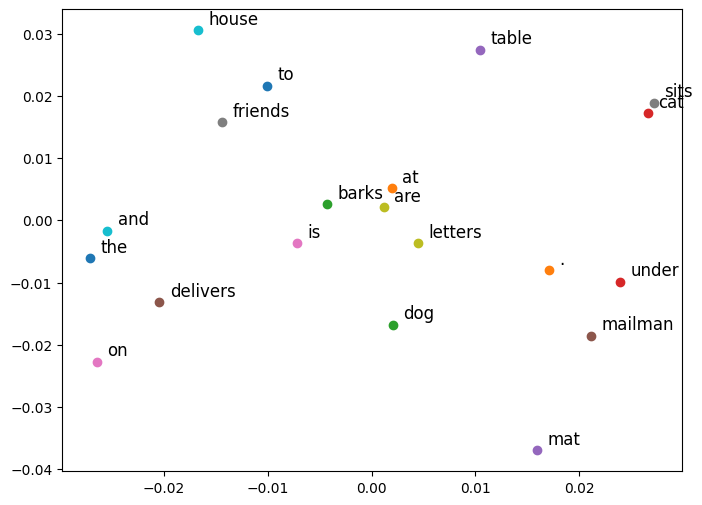

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 차원 축소  100차원 데이터를 2차원으로 축소해서 시각화
# 단어 벡터추출(상위 10개 단어만 사용)
words = list(model.wv.key_to_index.keys())[:50]
print(words)
word_vectors = [model.wv[word]  for word in words]
print(np.array(word_vectors).shape)
# PCA 로 2차원 축소
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# 시각화
plt.figure(figsize=(8,6))  # 크기
for word, (x,y) in zip(words, word_vecs_2d):
  plt.scatter(x,y)
  plt.text(x+0.001, y+0.001,word, fontsize=12)
plt.show()

응용 : 유사도 계산

In [39]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity  # 단어간 유사도 계산 함수
nltk.download('punkt')  # nltk에서 제공하는 문장 및 단어 토큰화 도구
nltk.download('punkt_tab')  # 문장 토크나이져하고 단어 토크나이져가 작동할때 내부적으로 참조하는 규칙파일

# 샘플 문서 데이터
documents = [
    "The cat sits on the mat.",
    "The dog barks at the mailman.",
    "A kitten is playing with a ball.",
    "The puppy is running in the park.",
    "The mailman delivers letters every morning."
]

# 문장 토큰화
tokenized_sentences = [word_tokenize(doc.lower()) for doc in documents]
# word2vec 모델 학습
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, sg=1)  # sg=1  word2vec   min_count=1 --> 소규모데이터

# 문장을 벡터로 변환 - 함수화
def document_vector(doc):
  words = word_tokenize(doc.lower())  # 100개의 벡터로 변환
  word_vectors = [model.wv[word] for word in words if word in model.wv]
  return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# 모든 문서를 벡터화
doc_vectors = np.array([document_vector(doc) for doc in documents])

# 문서 간 코사인 유사도 계산
similarities_matrix = cosine_similarity(doc_vectors)
# 결과 출력
import pandas as pd
df = pd.DataFrame(similarities_matrix, index=documents, columns=documents)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,The cat sits on the mat.,The dog barks at the mailman.,A kitten is playing with a ball.,The puppy is running in the park.,The mailman delivers letters every morning.
The cat sits on the mat.,1.000000,0.633000,0.208872,0.595126,0.303833
The dog barks at the mailman.,0.633000,1.000000,0.025271,0.536730,0.461127
A kitten is playing with a ball.,0.208872,0.025271,1.000000,0.312381,0.170074
The puppy is running in the park.,0.595126,0.536730,0.312381,1.000000,0.405266
The mailman delivers letters every morning.,0.303833,0.461127,0.170074,0.405266,1.000000


[['the', 'cat', 'sits', 'on', 'the', 'mat', '.'],
 ['the', 'dog', 'barks', 'at', 'the', 'mailman', '.'],
 ['a', 'kitten', 'is', 'playing', 'with', 'a', 'ball', '.'],
 ['the', 'puppy', 'is', 'running', 'in', 'the', 'park', '.'],
 ['the', 'mailman', 'delivers', 'letters', 'every', 'morning', '.']]